## Mathematical Modeling of SIS epidemics in networks

We will largely discuss SIS epidemics in the same order we did for SIR.

The SIS model is very much like the SIR model, except that when individuals recover they are once again susceptible.

### Sample outbreaks

Let's start by looking at a few samples, using the same networks we've been investigating.  We will use smaller networks because when we simulate SIS epidemics, the simulations tend to take longer.  This is because more events can happen in an SIS epidemic (indivduals who would be recovered in the SIR epidemic still participate in the SIS epidemic).

We also set the optional variable `tmax` which otherwise defaults to $100$.


ER


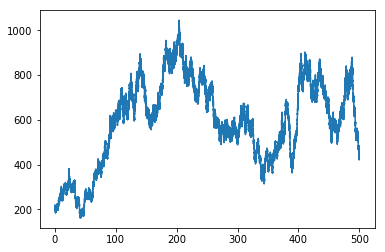

all 4


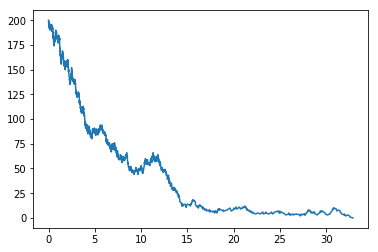

1 and 7


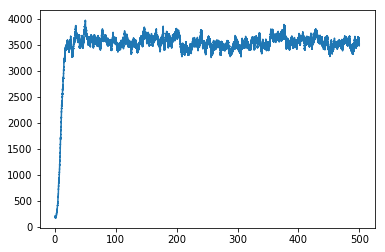

In [58]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt

plt.clf()
N=20000
tau = 0.26
gamma = 1
tmax = 500
rho = 0.01

for G, label in [(nx.fast_gnp_random_graph(N, 4/(N-1)), 'ER'), 
              (nx.configuration_model([4]*N), 'all 4'),
              (nx.configuration_model([1,7]*(N//2)), '1 and 7')]:
    t, S, I = EoN.fast_SIS(G, tau, gamma, rho = rho, tmax = tmax)
    plt.clf()
    print(label)
    plt.plot(t, I)
    plt.show()

## Phase transitions

At the end of the SIR part, we looked at how the behavior changes below and above the epidemic threshold. For SIS disease, we will see something similar.  We will focus on the value of $I$ at large time.  Let's take the networks above (1 at a time) and look at what happens to the final size as $\tau$ changes.  From some of the above, we see that there is an early time that it spends "ramping up".  This is often called the "burn-in" time by people who do simulations of epidemic spread.

To reduce the burn-in time, each time I change $\tau$, my simulations will take the final state of the system from the previous value of $\tau$ and use that to initialize.  This requires me to have more information than the default returned by the SIS simulations.  I will use the flag `return_full_data=True` as an argument to `EoN.fast_SIS`.  The documentation about what this returns [is here](https://epidemicsonnetworks.readthedocs.io/en/latest/EoN.html#simulation-investigation-toolkit).

If the previous epidemic went extinct, I will start with $10$% of the population infected.

I'd like to highlight one additional Python trick used here in labelling the $x$-axis.  The backslash-t in a string would normally be interpreted by python as saying to use a tab there.  But I want it to be passed on literally as a backslash to the LaTeX interpreter.  Putting an `r` before the quote mark starting the string tells Python not to interpret any of the characters as having a special meaning.  There are other ways around these issues, but this is the best.



0.0
0.025
0.05
0.075
0.1
0.125
0.15
0.175
0.2
0.225
0.25
0.275
0.3
0.325
0.35
0.375
0.4
0.425
0.45
0.475
0.5


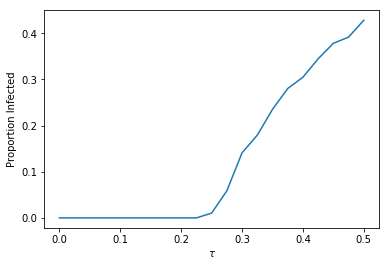

In [9]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
import numpy as np

plt.clf()
N=10000
gamma = 1
tmax = 50
rho = 0.1

taus = np.linspace(0, 0.5, 21)
Is = []

G = nx.fast_gnp_random_graph(N, 4/(N-1))
I=[0]  #just to initialize $I$ before starting the loop
for tau in taus:
    print(tau)
    if I[-1] == 0:
        sim = EoN.fast_SIS(G, tau, gamma, rho = rho, tmax = tmax, return_full_data=True)
    else:
        initial_infecteds = [node for node in final_status if final_status[node]=='I']
        sim = EoN.fast_SIS(G, tau, gamma, initial_infecteds = initial_infecteds, tmax = tmax, return_full_data=True)
    t = sim.t()
    I = sim.I()
    final_status = sim.get_statuses(time=t[-1])
    Is.append(I[-1]/N)
    
plt.plot(taus, Is)
plt.xlabel(r'$\tau$')
plt.ylabel('Proportion Infected')
plt.show()
    

0.0
0.025
0.05
0.075
0.1
0.125
0.15
0.175
0.2
0.225
0.25
0.275
0.3
0.325
0.35
0.375
0.4
0.425
0.45
0.475
0.5


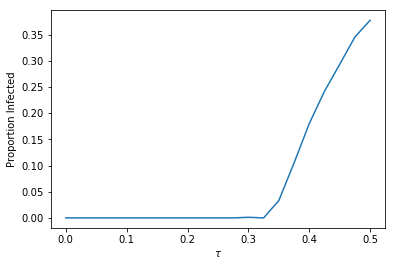

In [8]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
import numpy as np

plt.clf()
N=10000
gamma = 1
tmax = 50
rho = 0.1

taus = np.linspace(0, 0.5, 21)
Is = []

G = nx.configuration_model([4]*N)
I=[0]  #just to initialize $I$ before starting the loop
for tau in taus:
    print(tau)
    if I[-1] == 0:
        sim = EoN.fast_SIS(G, tau, gamma, rho = rho, tmax = tmax, return_full_data=True)
    else:
        initial_infecteds = [node for node in final_status if final_status[node]=='I']
        sim = EoN.fast_SIS(G, tau, gamma, initial_infecteds = initial_infecteds, tmax = tmax, return_full_data=True)
    t = sim.t()
    I = sim.I()
    final_status = sim.get_statuses(time=t[-1])
    Is.append(I[-1]/N)
    
plt.plot(taus, Is)
plt.xlabel(r'$\tau$')
plt.ylabel('Proportion Infected')

plt.show()
    



0.0
0.025
0.05
0.075
0.1
0.125
0.15
0.175
0.2
0.225
0.25
0.275
0.3
0.325
0.35
0.375
0.4
0.425
0.45
0.475
0.5


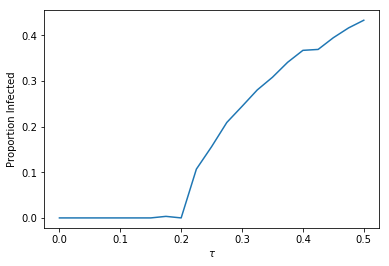

In [10]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
import numpy as np

plt.clf()
N=10000
gamma = 1
tmax = 50
rho = 0.1

taus = np.linspace(0, 0.5, 21)
Is = []

G = nx.configuration_model([1,7]*(N//2))
I=[0]  #just to initialize $I$ before starting the loop
for tau in taus:
    print(tau)
    if I[-1] == 0:
        sim = EoN.fast_SIS(G, tau, gamma, rho = rho, tmax = tmax, return_full_data=True)
    else:
        initial_infecteds = [node for node in final_status if final_status[node]=='I']
        sim = EoN.fast_SIS(G, tau, gamma, initial_infecteds = initial_infecteds, tmax = tmax, return_full_data=True)
    t = sim.t()
    I = sim.I()
    final_status = sim.get_statuses(time=t[-1])
    Is.append(I[-1]/N)
    
plt.plot(taus, Is)
plt.xlabel(r'$\tau$')
plt.ylabel('Proportion Infected')

plt.show()
    




## Extinction

We should note that in the SIS model in a *finite* graph, disease extinction is inevitable. 

This is because:
- there are only a finite number of possible states of the system. [there are in fact $2^N$ possible states, which is huge]
- from any state, it is possible to reach the extinct state.
- once extinct, it remains extinct.

In the Markov-Chain context the extinct state is referred to as an absorbing state.  When the conditions above hold, the absorbing state eventually captures everything.

This can be proven similarly to how we proved that the PageRank algorithm converges to a unique vector of probabilities.  If we think of the different possible states of the network as a node in a new 'super-network', with weighted edges denoting the possibility of going from one node of the 'super-network' to another, then the process is really just a version of PageRank without the teleport jumps and the surfer chooses to follow the edges with a weighted probability.  We can prove the existence of a dominant eigenvalue of $1$, and that the eigenvector has zeros except for the extinct state.  However, above the "epidemic threshold" the second eigenvalue is typically very very close to $1$. and gives high probability to some states that are not close to the extinct state.

So if it's not extinct yet, it is probably far from being extinct.  It will take many (often unlikely) steps to reach the extinction state.  These statements become stronger as $N$ grows.

Let's look at a very small example.  A complete network with $N=3$.

![image](3NodeSIS.png)

There are $8$ possible states: $III$, $SII$, $ISI$, $IIS$, $SSI$, $SIS$, $ISS$, and $SSS$.

To analyze this, we'll think about the sequence of states that it steps through.  We won't worry about the precise timing of those (so we won't worry about how long it stays in each state).  We just care about: given where it is, where does it go next.  We take the convention that if it is in the extinct state, it goes back to itself at the next time.

The matrix giving transition probabilities is
\begin{equation*}
\begin{pmatrix}
0 & \frac{\tau}{\tau+\gamma} & \frac{\tau}{\tau+\gamma} & \frac{\tau}{\tau+\gamma} & 0 & 0 & 0 & 0\\
1/3 & 0& 0 & 0 & \frac{\tau}{2\tau+\gamma} & \frac{\tau}{2\tau+\gamma} & 0 & 0\\
1/3 & 0& 0 & 0 &  \frac{\tau}{2\tau+\gamma}& 0 & \frac{\tau}{2\tau+\gamma} & 0\\
1/3 & 0& 0 & 0 & 0 & \frac{\tau}{2\tau+\gamma} & \frac{\tau}{2\tau+\gamma} & 0\\
0 & \frac{\gamma}{2\tau+2\gamma}& \frac{\gamma}{2\tau+2\gamma} & 0  & 0 & 0 & 0 & 0\\             
0 &\frac{\gamma}{2\tau+2\gamma} & 0 & \frac{\gamma}{2\tau+2\gamma}& 0 & 0 & 0 & 0\\
0 & 0 & \frac{\gamma}{2\tau+2\gamma} & \frac{\gamma}{2\tau+2\gamma}& 0 & 0 & 0 & 0\\
0 & 0 & 0 &0 &  \frac{\gamma}{2\tau+\gamma} & \frac{\gamma}{2\tau+\gamma} & \frac{\gamma}{2\tau+\gamma}& 1\\
\end{pmatrix}
\end{equation*}

Let's analyze this matrix's properties.

In [116]:
import numpy as np
import scipy

tau = 2
gamma = 1

c1 = tau/(tau+gamma)
c2 = tau/(2*tau+gamma)
c3 = gamma/(2*tau+2*gamma)
c4 = gamma/(2*tau+gamma)
M = np.array([[0, c1, c1, c1, 0, 0, 0, 0], 
              [1/3, 0, 0, 0, c2, c2, 0, 0], 
              [1/3, 0, 0, 0, c2, 0, c2, 0], 
              [1/3, 0, 0, 0, 0, c2, c2, 0],
              [0, c3, c3, 0, 0, 0, 0, 0], 
              [0, c3, 0, c3, 0, 0, 0, 0],
             [0, 0, c3, c3, 0, 0, 0, 0],
             [0, 0, 0, 0, c4, c4, c4, 1]])
print(M)

R, W = scipy.linalg.eig(M)

W = np.real(W)
print('eigenvalues')
print('R', R)

print('\n','dominant eigenvector')
print(W[:,0])
print('\n','next two eigenvectors')
print(W[:,1])
print(W[:,2])
print('\n','next four eigenvectors')
print(W[:,3])
print(W[:,4])
print(W[:,5])
print(W[:,6])
print('\n','eigenvector of 0')
print(W[:,7])



[[ 0.          0.66666667  0.66666667  0.66666667  0.          0.          0.
   0.        ]
 [ 0.33333333  0.          0.          0.          0.4         0.4         0.
   0.        ]
 [ 0.33333333  0.          0.          0.          0.4         0.          0.4
   0.        ]
 [ 0.33333333  0.          0.          0.          0.          0.4         0.4
   0.        ]
 [ 0.          0.16666667  0.16666667  0.          0.          0.          0.
   0.        ]
 [ 0.          0.16666667  0.          0.16666667  0.          0.          0.
   0.        ]
 [ 0.          0.          0.16666667  0.16666667  0.          0.          0.
   0.        ]
 [ 0.          0.          0.          0.          0.2         0.2         0.2
   1.        ]]
eigenvalues
R [  1.00000000e+00+0.j   9.66091783e-01+0.j  -9.66091783e-01+0.j
  -2.58198890e-01+0.j  -2.58198890e-01+0.j   2.58198890e-01+0.j
   2.58198890e-01+0.j   1.54369358e-17+0.j]

 dominant eigenvector
[ 0.  0.  0.  0.  0.  0.  0.  1.]

 next tw

The eigenvalues of $R$ are $1$, $0.966$, $-0.966$, and some smaller values.  

The eigenvalue $1$ is the largest eigenvalue.  Its eigenvector corresponds to having extinction as the only possible state.  We see that there are 2 eigenvalues that have magnitude about $0.966$, so these are close to $1$.  It takes a while for the iteration to make these terms small.  Note also that these two eigenvalues are a fair bit larger for the states that are farther from the extinct state.

The closeness to $1$ and the location of large entries in the eigenvectors becomes stronger as $\tau$ increases.

Let's do a bunch of simulations and see how simulations compare.

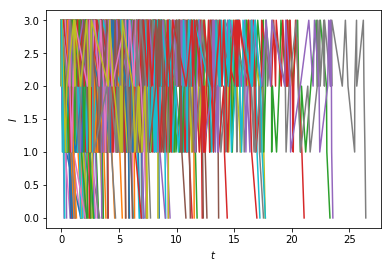

In [32]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt


G = nx.Graph()
G.add_edges_from([(0,1), (1,2), (0,2)])
plt.clf()
tau = 2
gamma = 1

for counter in range(100):
    t, S, I = EoN.fast_SIS(G, tau, gamma, rho=1)  #start with all individuals infected.
    plt.plot(t,I)
plt.xlabel('$t$')
plt.ylabel('$I$')
plt.show()

Let's repeat that, this time, keeping track of exactly what all the transitions are.  For each simulation, we'll keep track of the sequence of states that simulation enters, and plot the probability at each step.  Then we'll compare with the prediction.  This will require setting the flag `return_full_data = True`.  Note that when we convert to a sequence of states, we are losing time information (how long it spends in each state).  Since some states have higher rates of exiting than others, the probability that, say, visit 200 is to a particular state isn't directly related to the probability of being at that state at a specific time.

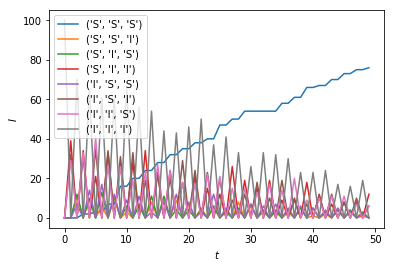

here is the prediction from the linear algebra.  Note that many curves lie on top of each other here, but not in the stochastic simulation


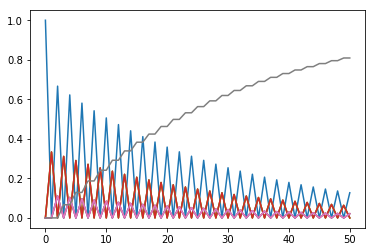

In [129]:
import networkx as nx
import EoN
import matplotlib.pyplot as plt
from itertools import product as cart_product

def convert_sim_to_sequence(sim):
    r''' This will take the simulation and extract the states that it visits in the order it goes.'''
    states = []
    for time in sim.t():
        state = sim.get_statuses(time=time)
        states.append((state[0], state[1], state[2]))
    return states
    
max_transitions = 50
G = nx.Graph()
G.add_edges_from([(0,1), (1,2), (0,2)])
plt.clf()
tau = 2
gamma = 1

frequencies = {date: {state:0 for state in cart_product(('S', 'I'), repeat = 3)} for date in range(max_transitions)}
for counter in range(100):
    sim = EoN.fast_SIS(G, tau, gamma, rho=1, return_full_data = True)  #start with all individuals infected.
    sequence = convert_sim_to_sequence(sim)
    if len(sequence)<max_transitions:
        sequence += [('S', 'S', 'S')]*(max_transitions-len(sequence))
    for date, state in enumerate(sequence):
        if date < max_transitions:
            frequencies[date][state]+=1
            
for state in cart_product(('S', 'I'), repeat = 3):
    plt.plot(range(max_transitions), [frequencies[counter][state] for counter in range(max_transitions)], label = state)
plt.xlabel('$t$')
plt.ylabel('$I$')
plt.legend()
plt.show()

import numpy as np
import scipy

c1 = tau/(tau+gamma)
c2 = tau/(2*tau+gamma)
c3 = gamma/(2*tau+2*gamma)
c4 = gamma/(2*tau+gamma)
M = np.array([[0, c1, c1, c1, 0, 0, 0, 0], 
              [1/3, 0, 0, 0, c2, c2, 0, 0], 
              [1/3, 0, 0, 0, c2, 0, c2, 0], 
              [1/3, 0, 0, 0, 0, c2, c2, 0],
              [0, c3, c3, 0, 0, 0, 0, 0], 
              [0, c3, 0, c3, 0, 0, 0, 0],
             [0, 0, c3, c3, 0, 0, 0, 0],
             [0, 0, 0, 0, c4, c4, c4, 1]])

p = np.array([1,0,0,0,0,0,0,0])

ps = [p]
for counter in range(max_transitions): #these lines probably demonstrate my relative ignorance of numpy
    ps.append(M.dot(ps[-1]))                #I'm creating a matrix,[p, Mp, M^2p, ...]

ps = np.array( ps)


print('here is the prediction from the linear algebra.  Note that many curves lie on top of each other',
      'here, but not in the stochastic simulation')

for counter in range(8):
    plt.plot(ps[:,counter])

plt.show()


We can think of what is happening here as the eigenvector of $1$ stores the total probability and says that it's going to end up in the final state.

The other eigenvectors are corrections.  Notice that each eigenvector (other than the one for $1$) sums to $0$, so we can add any correction without changing the total probability from $1$ (though we cannot add an arbitrary amount without some probabilities becoming negative).  Initially the corrections are quite large.  As time progresses, the corrections get smaller.

The first correction to get small corresponds to the eigenvector of $0$.  What this says is that if I have a bunch of simulations, and we stop them at one time.  You take some that currently have two susceptibles and one infected, and then you replace them with a carefully chosen number of all infected and another number of all susceptible.  Then if you simulate forward, after the first transition, there's no difference from what I would have had without the change. 

The next set of corrections to get small correspond to the eigenvectors of about $1/4$.  These eigenvectors are basically $0$ for the $3S$ and $3I$ states.  Basically what they tell us is that if we move probability around within the $2S+I$ states or within the $2I+S$, the simulations quickly forget the specifics of which 2 started susceptible or which 2 started infected.

The final 2 say something about what the system would like to do at large time given that it hasn't died out yet. Basically they say that if it hasn't died out yet the system probably has a relatively large number of infected individuals, and is unlikely to be close to dying out.  The fact that there are 2 of them of the same magnitude but opposite signs reflects the fact that we know the system has to oscillate between even and odd states (until extinction).  This lets it do that.

## Size Biasing

In the SIR framework, high degree nodes are preferentially infected with probability proportional to their degree.  Then, if they are infected early in the outbreak, the expected number of new infections is (almost) proportional to their degree.

In the SIS framework, very similar behavior is observed.  However, it can be tricky.  When a high degree node recovers, it is likely to have many infected neighbors, so it is likely to be re-exposed.  This effect is fundamentally what makes rigorous analysis of SIS epidemics harder than for SIR epidemics.


### $R_0$

The calculation, and even the definition, of $R_0$ is more nuanced for an SIS epidemic on a network.  For some degree distributions, particularly for those with a non-negligible number of really high degree nodes, I don't know that we really have a clear definition (people may write one down, but I don't believe them).

However, for populations without very high degree nodes, I think we can generally get a good idea of what $R_0$ is.

At the "leading edge" as the disease spreads out from the initial node, transmissions occur much like in the SIR disease.  Basically all of those nodes that would be infected in the SIR model early on are also infected in the SIS model.  So we expect $R_0$ of the SIS model should be at least as large as the SIR model (particularly close to the epidemic threshold where $R_0 \approx 1$).  

We will make the assumption that the probability a node is infected is proportional to its degree.  This is what we saw for the SIR case.

The subsequent cases that are infected, can sometimes reinfect their infectors.  Also, sometimes they can reinfect nodes that they infect but later recover.  A "subsequent case" will *transmit* an average of $\tau/\gamma$ times to each neighbor before recovering, but the neighbor may or may not be infected already.  In this thought experiment,  a "transmission" is an interaction that would be enough to cause infection, but we don't know whether the recipient is susceptible.  We would believe that $R_0$ has an upper bound of the expected number of **transmissions** (which may not all be successful)  and we **anticipate** that the expected number of transmissions is $(\langle K^2\rangle / \langle K \rangle ) (\tau/\gamma)$:
\begin{equation*}
\frac{\tau}{\tau+\gamma} \frac{\langle K^2-K \rangle}{\langle K \rangle} \leq R_0 \leq \frac{\tau}{\gamma} \frac{\langle K^2 \rangle}{\langle K \rangle}
\end{equation*}
Our anticipation may be wrong however, because high degree nodes have an additional source of infection: neighbors that they infected.

### $R_0$ for power-law networks
However, even this may not be enough, and the clearest problems come from networks for which the degree distribution is a power law: $P(k) \propto k^{-\alpha}$.

In the **SIR case**, we saw that for networks with exponents $2 < \alpha < 3$ the value of $\langle K^2 -K\rangle$ is infinite (in the large network limit) while $\langle K \rangle$ is finite.  [note that of course in any finite network they are both finite, but as the network size is allowed to grow, new higher degree nodes will occur frequently enough to increase $\langle K^2 -K\rangle$].  So since the ratio is infinite, we conclude that for SIR disease, these networks have infinite $R_0$.

But in the **SIS case** something different happens.  Even for larger values of $\alpha$ such that the ratio is finite, it [can be proven](https://projecteuclid.org/euclid.aop/1258380791) that no matter how small $\tau$ is, the disease can persist in the large population limit.

What's going on there?  In SIS disease there is an additional reason that high-degree nodes are important.  Not only are they more likely to get infected, and also more likely to transmit the disease on, but they are also more likely to be reinfected by their neighbors.  Effectively once a high degree node is infected, it becomes the center of an island of infection in the network.  Whenever it happens to recover, it is promptly reinfected by one of its many infected neighbors.  It takes a very long time for one of these islands to go extinct.  In the meantime, the disease occassionally spreads out from the island.  Some of these long transmission chains manage to reach another high degree node.  So by the time the region around a high-degree node manages to lose infection, some other high degree node has become infected.

## Mathematical Models

As with the SIR case there have been many attempts to produce differential equations models that will capture the dynamics of an SIS epidemic.  These models are generally very similar to SIR models.  In particular, some of them make *identical* predictions about epidemic thresholds as the corresponding SIR model.  Fundamentally this is because these models ignore partnerships.  By assuming that the probability a susceptible node's neighbor is infected is the same as that of the partner of any other node, these are implicitly assuming that the network is continually rewiring.  

If the population is rewiring all the time, then an infected indivdual very early in an SIR or an SIS epidemic with the same duration of infection and transmission rate will cause the same number of transmissions, all of which will be to new individuals.  Thus whether it takes off or not is the same under these assumptions.  The physics literature referrs to this continually rewiring population as an "annealed network", while a static network is a "quenched network."  My goal is to have a good model for the quenched network.

### Mean-field
[See chapter 4 of *Mathematics of Epidemics on Networks*, in particular section 4.2]

In the mean-field model, we simply have $S$ and $I$ compartments.  

We assume that
- Infected individuals have the same average degee as everyone else, so the probability a random individual's partner is infected is $I/N$.
- Susceptible individuals have average degree $\langle K \rangle$.
- Thus susceptible individuals have on average $\langle K \rangle I/N$ infected neighbors, each transmitting with rate $\tau$.
- Once infected, individuals recover with rate $\gamma$.

[can you see that there are issues with the assumption that average degree of susceptible and infected individuals is the population average?  Also can you see a problem with the assumption that the number of susceptible/infected interactions is what you would predict from just random mixing?]

The total flux from $S$ to $I$ is  $S \frac{\tau \langle K \rangle I}{N}$. 

The total flux from $I$ back to $S$ is $\gamma I$.

This produces the model:
\begin{align*}
\frac{d}{dt} S &= - \frac{ \tau S I \langle K \rangle}{N} + \gamma I\\
\frac{d}{dt} I &= \frac{ \tau S I \langle K \rangle}{N} - \gamma I\\
\end{align*}

#### Comparison with simulation:

In `EoN`, this is encoded in `EoN.SIS_homogeneous_meanfield`.  [Here is the documentation](https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.SIS_homogeneous_meanfield.html).
[I think this is the one example where `EoN` doesn't have a built in version to read in properties directly from the graph.  Luckily we just need the average degree, 4]

We'll compare this with simulations in the three populations we've looked at earlier (each with average degree $4$): an Erdős–Rényi network, a Configuration Model network with all having exactly $4$, and a Configuration Model network with half having degree $1$ and half degree $7$.

We'll set $\tau = 0.5$ and $\gamma = 1$.

First we'll do an Erdős–Rényi network with average 4.  Since $S$ can run forever, we'll set the optional argument `tmax` to 30 (default is 100 in SIS and infinity in SIR).  We'll also use smaller networks because even over the same time scale, an SIS epidemic has many more events than an SIR epidemic (which makes the simulations slow).

4301 5000.00000225


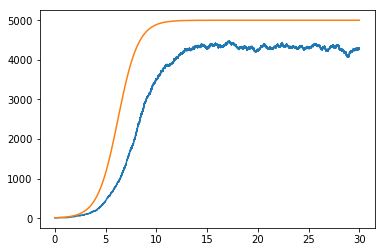

In [140]:
import EoN
import networkx as nx
import matplotlib.pyplot as plt

N=10000
kave = 4
tau = 0.5
gamma = 1
rho = 0.001 #initial proportion infected

G = nx.fast_gnp_random_graph(N, kave/(N-1))

t, S, I  = EoN.fast_SIS(G, tau, gamma, rho = rho, tmax = 30)

calc_t, calc_S, calc_I  = EoN.SIS_homogeneous_meanfield(
                                 N*(1-rho), rho*N, kave, tau, gamma,
                                 tmax = t[-1])

plt.plot(t, I)
plt.plot(calc_t, calc_I)
print(I[-1], calc_I[-2])
plt.show()

That's obviously not exact, but it's crudely reasonable.  Let's go ahead and do all 3 graphs we did for SIR at once (since the prediction is the same for all). We'll do this by looping over the three graphs.

ER
all 4
1 and 7


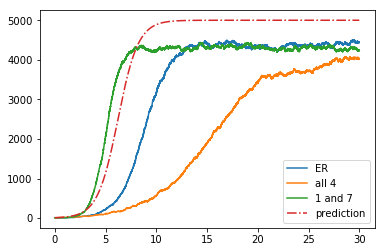

In [141]:
import EoN
import networkx as nx
import matplotlib.pyplot as plt

plt.clf()

N=10000
kave = 4
tau = 0.5
gamma = 1
rho = 0.001 #initial proportion infected

tmax = 0  #to be fed to the differential equations model.  Need to find 
          #the maximum seen in the loop.
    
for G, label in [(nx.fast_gnp_random_graph(N, 4/(N-1)), 'ER'), 
              (nx.configuration_model([4]*N), 'all 4'),
              (nx.configuration_model([1,7]*(N//2)), '1 and 7')]:
    print(label)
    t, S, I = EoN.fast_SIS(G, tau, gamma, rho = rho, tmax=30)
    plt.plot(t, I, label = label)
    tmax = max(tmax, t[-1])

calc_t, calc_S, calc_I = EoN.SIS_homogeneous_meanfield(
                                 N*(1-rho), rho*N, kave, tau, gamma,
                                 tmax = tmax)

plt.plot(calc_t, calc_I, '-.', label = 'prediction')
plt.legend()
#plt.axis(xmax=30)
plt.show()



As before, the simplicity of this model allows us to investigate what causes different phenomena.  So if we see similar phenomena in our simulations or in the real-world, we have a better understanding of why it happens. 

#### Equilibrium prevalence

The value of $I$ in our prediction grows and eventually approaches an equilibrium (about which it oscillates).  We can predict exactly the condition to be at the equilibrium, by setting $dI/dt=0$:
\begin{equation*}
\tau \langle K \rangle \frac{S}{N} = \gamma
\end{equation*}
That is, the rate at which an infected node transmits disease to susceptible nodes balances the rate of recovery.  As the epidemic begins, $S$  decreases and $I$ increases.  They approach this equilibrium monotonically.


#### Threshold prediction
Now, let's try to understand the threshold.

We are interested in whether the introduction of a small amount of infection can lead to growth.  Again from the $I$ equation, we have
\begin{equation*}
\frac{d}{dt} I = I \left( \tau \langle K \rangle \frac{S}{N} - \gamma\right)
\end{equation*}
We assume that early in the epidemic $S \approx N$, so $S/N \approx 1$.  Then the condition for whether invasion to be possible is
\begin{equation*}
\frac{\tau \langle K \rangle}{\gamma} > 1
\end{equation*}
This is exactly the same threshold that the equivalent SIR model predicted.

#### Model limitations
The model gives us insights into what happens in an epidemic.  However, it has several shortcomings.  The first are shortcomings of the SIR model as well:
- It ignores the fact that individuals have different numbers of partners, and in particular that infected individuals tend to have higher degree than susceptible individuals.
- It ignores the fact that an individual who becomes infected has one less susceptible partner than its degree.
- More subtley, it also ignores the fact that when an infected individual has transmitted, the number of susceptible partners it has decreases by $1$.  So in reality infected nodes disproportionately connect to infected nodes.

There is another shortcoming that is very important:
- When an individual recovers, it is likely to have more infected individuals around it.
This means it is at higher risk of infection than another susceptible indivdiual of the same degree.  This is particularly significant for high degree nodes.


In practice, this model will do quite well when the degrees are all similar, and the transmission probabilities are low.  If we have such a situation, and an epidemic happens, then we must also have reasonably high average degree.  When we have such a population, we expect this model to be reasonable.


### Heterogeneous mean-field

[See Chapter 5 of Mathematics of Epidemics on Networks, particularly section 5.2]

Our first attempt to improve the model will fix the assumption that all individuals have the same number of partners.  This is the heterogeneous mean-field model.  In this model, we group the susceptible, infected, and recovered individuals by degree.  


So we have
\begin{equation*}
S_k, \qquad I_k
\end{equation*}
to denote the total number of individuals of each status for each $k$.

We introduce an additional variable
\begin{equation*}
\pi_I = \frac{ \sum_k k I_k}{\sum_k k N_k}
\end{equation*}
which is the proportion of all edges in the network that connect to infected individuals.  This is the probability a random individual's partner is infected (note, one could argue that the partner of a random susceptible individual is less likely to be infected than the partner of a random infected individual).

The model is
\begin{align*}
\frac{d}{dt} S_k &= - \tau \pi_I k S_k + \gamma I_k\\
\frac{d}{dt} I_k &= \tau \pi_I k S_k - \gamma I_k\\
\pi_I &= \frac{\sum_k k I_k}{\sum_k k N_k}
\end{align*}

#### Comparison with Simulation

In `EoN`, this is encoded in `EoN.SIS_heterogeneous_meanfield`.  However, we will use the version `EoN.SIS_heterogeneous_meanfield_from_graph` which will read in the graph and measure it's properties and then call `EoN.SIS_heterogeneous_meanfield`.  [Here is the documentation](https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.SIS_heterogeneous_meanfield_from_graph.html). 

Note that we have a different prediction for each graph.

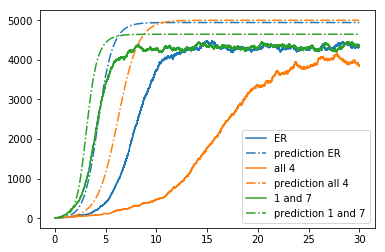

In [146]:
import EoN
import networkx as nx
import matplotlib.pyplot as plt

plt.clf()

N=10000
kave = 4
tau = 0.5
gamma = 1
rho = 0.001 #initial proportion infected

tmax = 30  #to be fed to the differential equations model.  Need to find 
          #the maximum seen in the loop.
    
ax = plt.gca() #needed because I'm being a bit fancy to make the 
               #color of the prediction match the simulation.
               #You can ignore this if you just
               #remove the color stuff in the loop.
        
for G, label in [(nx.fast_gnp_random_graph(N, 4/(N-1)), 'ER'), 
              (nx.configuration_model([4]*N), 'all 4'),
              (nx.configuration_model([1,7]*(N//2)), '1 and 7')]:
    
    color = next(ax._get_lines.prop_cycler)['color'] 
    #see https://stackoverflow.com/questions/28779559/how-to-set-same-color-for-markers-and-lines-in-a-matplotlib-plot-loop
    #for an explanation of what's going on with this color stuff.
    
    t, S, I = EoN.fast_SIS(G, tau, gamma, rho = rho, tmax=30)
    plt.plot(t, I, label = label, color = color)
    tmax = max(tmax, t[-1])
    calc_t, calc_S, calc_I = EoN.SIS_heterogeneous_meanfield_from_graph(
                                 G, tau, gamma, rho = rho, tmax = 30)


    plt.plot(calc_t, calc_I, '-.', label = 'prediction '+ label, color = color)
plt.legend()
#plt.axis(xmax = 20)
plt.show()



The main improvement here is that we are able to use the model to predict which populations will have faster epidemics.  We still do not have particularly good agreement.

#### Threshold

Before taking further steps to improve the model, let's look at the predicted threshold.  To do this, we'll write down a differential equation for $\pi_I$ and decide whether $\pi_I$ increases or decreases after the disease is introduced.

\begin{align*}
\frac{d}{dt} \pi_I &= \frac{\sum_k k \frac{d}{dt} I_k}{\sum_k k N_k}\\
&= \frac{\sum_k k \left(\tau \pi_I k S_k - \gamma I_k\right)}{\sum_k k N_k}\\
&= \frac{ \pi_I \tau \sum_k k^2 S_k - \gamma\sum_k k I_k}{\sum_k k N_k}\\
&= \frac{\pi_I \tau \sum_k k^2 S_k}{\sum_k k N_k} -  \gamma \pi_I\\
&= \pi_I \left( \frac{\tau \sum_k k^2 S_k}{\sum_k k N_k} - \gamma\right)
\end{align*}
Early in the epidemic, $S_k \approx N_k$ and we have
\begin{equation*}
\frac{d}{dt} \pi_I = \pi_I \left(\tau \frac{\langle K^2 \rangle}{\langle K \rangle}  - \gamma\right)
\end{equation*}
and so we see that epidemics are predicted if
\begin{equation*}
\frac{\tau}{\gamma} \frac{\langle K^2 \rangle}{\langle K \rangle}  > 1
\end{equation*}

This is the same as we found for the SIR epidemic.  




### Effective Degree model
[See section 5.6 of *Mathematics of Epidemics on Networks*]

So we seem to have improved matters by tracking the heterogeneity in the population.  But we haven't yet included the fact that the neighbors of susceptible or infected individuals are likely reflect the status of the individual.  This is particularly important because in the SIS case, when a high-degree node recovers it will have more infected neighbors than we would expect for a high-degree node that has never been infected.

Our goal now is to track the exact number of susceptible and infected partners each infected individual has.  So we will use $S_{s,i}$ to denote the number of susceptible individuals with $s$ susceptible neighbors and $i$ infected neighbors.  We can summarize this with the following figure:

<img src="Effective_Degree.png" width="600"/>

In the figure, the notation $[ISS_{s,i}]$ denotes the number of ways you can find $3$ nodes such that an infected node is joined to a susceptible node who is joined to another susceptible node with $s$ susceptible and $i$ infected neighbors.  To calculate this, we find how many I-S-S triples there are, which is $\sum_{m,n} mnS_{m,n}$.  The probability that the last triple is a susceptible individual with exactly $s$ susceptible neighbors and $i$ infected neighbors is equal to the proportion $\frac{sS_{s,i}}{\sum_{m,n} mS_{s,i}} $.

The equations are
\begin{align*}
\frac{d}{dt} S_{s,i} &= \tau [ISS_{s+1,i-1}] - \gamma I S_{s,i} + \gamma(i+1)S_{s,i+1} - \tau[ISS_{s,i}] - \tau i S_{s,i} + \gamma I_{s,i}\\
\frac{d}{dt} I_{s,i} &= \tau(s+1)I_{s+1,j-1} + \tau [ISI_{s+1,i-1}] - \gamma i I_{s,i} + \tau i S_{s,i} - \gamma I_{s,i} + \gamma (i+1)I_{s-1,i+1} - \tau sI_{s,i} - \tau [ISI_{s,i}]\\
[ISS_{s,i}] &= \left(\sum_{m,n} mnS_{m,n}\right) \frac{sS_{s,i}}{\sum_{m,n} mS_{s,i}} \\
[ISI_{s,i}] &= \frac{\sum_{m,n}m(m-1)S_{m,n}}{\sum_{m,n} mI_{m,n}}sI_{s,i}
\end{align*}
#### Comparison with simulations
How well does this do?  To check, we'll use `EoN.SIS_effective_degree_from_graph`, whose [documentation is here](https://epidemicsonnetworks.readthedocs.io/en/latest/functions/EoN.SIS_effective_degree_from_graph.html).

ER
all 4
1 and 7


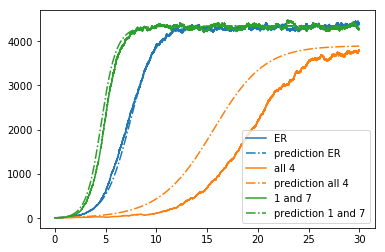

In [148]:
import EoN
import networkx as nx
import matplotlib.pyplot as plt

plt.clf()

N=10000
kave = 4
tau = 0.5
gamma = 1
rho = 0.001 #initial proportion infected

tmax = 30  #to be fed to the differential equations model.  Need to find 
          #the maximum seen in the loop.
    
ax = plt.gca() #needed because I'm being a bit fancy to make the 
               #color of the prediction match the simulation.
               #You can ignore this if you just
               #remove the color stuff in the loop.
        
for G, label in [(nx.fast_gnp_random_graph(N, 4/(N-1)), 'ER'), 
              (nx.configuration_model([4]*N), 'all 4'),
              (nx.configuration_model([1,7]*(N//2)), '1 and 7')]:
    print(label)
    color = next(ax._get_lines.prop_cycler)['color'] 
    #see https://stackoverflow.com/questions/28779559/how-to-set-same-color-for-markers-and-lines-in-a-matplotlib-plot-loop
    #for an explanation of what's going on with this color stuff.
    
    t, S, I = EoN.fast_SIS(G, tau, gamma, rho = rho, tmax=30)
    plt.plot(t, I, label = label, color = color)
    tmax = max(tmax, t[-1])
    calc_t, calc_S, calc_I= EoN.SIS_effective_degree_from_graph(
                                 G, tau, gamma, rho = rho, tmax = tmax)


    plt.plot(calc_t, calc_I, '-.', label = 'prediction '+ label, color = color)
plt.legend()
plt.show()




Now that is a lot better.

A limitation of this model however, is that it is difficult to interpret.  I don't think there is a way to calculate the threshold without turning this into a matrix problem and determining whether an eigenvalue is greater than $0$.

So we see a tradeoff that frequently comes up in applied mathematics: the more complete model is more accurate, but it is harder to understand and harder to learn things from.